In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

punta arenas cl
grand river south east mu
bereda so
kurayoshi jp
punta arenas cl
hilo us
jinchang cn
akranes is
jamestown sh
khandbari np
westlock ca
manzhouli cn
satao pt
zyryanka ru
fort nelson ca
lolua tv
nanortalik gl
chokurdakh ru
tuktoyaktuk ca
arraial do cabo br
hasaki jp
piacabucu br
bredasdorp za
hilo us
carnarvon au
maumere id
new norfolk au
kaitangata nz
provideniya ru
hilo us
kodiak us
labuhan id
waw sd
rikitea pf
ushuaia ar
acarau br
ushuaia ar
san luis ar
tuktoyaktuk ca
grindavik is
victoria sc
busselton au
bredasdorp za
yellowknife ca
seydi tm
hermanus za
ejido ve
balkanabat tm
cidreira br
saldanha za
wagar sd
kaeo nz
san patricio mx
kenai us
saint george bm
bluff nz
rikitea pf
muroto jp
cape town za
saint-philippe re
kavaratti in
pochutla mx
illoqqortoormiut gl
taolanaro mg
presidencia roque saenz pena ar
jamestown sh
finschhafen pg
asau tv
bredasdorp za
jaynagar-majilpur in
avarua ck
buribay ru
kouango cf
jamestown sh
shelburne ca
ushuaia ar
bluff nz
punta arenas cl
ta

shingu jp
new norfolk au
palmer us
port-gentil ga
ushuaia ar
hadishahr ir
qaanaaq gl
barentsburg sj
kathmandu np
avarua ck
cape town za
harper lr
nanortalik gl
talara pe
saleaula ws
albany au
provideniya ru
tautira pf
lasa cn
naze jp
puerto ayora ec
tasiilaq gl
atuona pf
saint anthony ca
gornopravdinsk ru
barentsburg sj
ushuaia ar
albany au
hermanus za
nizhneyansk ru
jamestown sh
cabo san lucas mx
lagoa pt
makat kz
jamestown sh
tuktoyaktuk ca
adrar dz
asfi ma
ambulu id
sinnamary gf
ashqelon il
upernavik gl
san patricio mx
hermanus za
cape town za
natal br
marica br
riachao das neves br
chitrakonda in
lolua tv
avarua ck
cape town za
keshan cn
omboue ga
rikitea pf
mehamn no
khatanga ru
hilo us
hobyo so
strezhevoy ru
hermanus za
hermanus za
carnarvon au
hermanus za
bluff nz
provideniya ru
gat ly
esso ru
punta arenas cl
alexandria eg
barentsburg sj
kenai us
khatanga ru
vao nc
port alfred za
pangnirtung ca
rikitea pf
avarua ck
arraial do cabo br
hobart au
atuona pf
luang prabang la
ewa beac

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


634

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd0fe44aef4dce7af7b5538848f649ff


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
        
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | bereda
Processing Record 4 of Set 1 | kurayoshi
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | jinchang
Processing Record 7 of Set 1 | akranes
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | khandbari
Processing Record 10 of Set 1 | westlock
Processing Record 11 of Set 1 | manzhouli
Processing Record 12 of Set 1 | satao
Processing Record 13 of Set 1 | zyryanka
Processing Record 14 of Set 1 | fort nelson
Processing Record 15 of Set 1 | lolua
City not found. Skipping...
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | piacabucu
Process

Processing Record 33 of Set 4 | longlac
City not found. Skipping...
Processing Record 34 of Set 4 | katsuura
Processing Record 35 of Set 4 | yelan
Processing Record 36 of Set 4 | vila franca do campo
Processing Record 37 of Set 4 | napanee
Processing Record 38 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 39 of Set 4 | sitka
Processing Record 40 of Set 4 | sakakah
Processing Record 41 of Set 4 | azimur
City not found. Skipping...
Processing Record 42 of Set 4 | celestun
Processing Record 43 of Set 4 | port macquarie
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | da nang
Processing Record 46 of Set 4 | portland
Processing Record 47 of Set 4 | saint-pierre
Processing Record 48 of Set 4 | kununurra
Processing Record 49 of Set 4 | la peca
Processing Record 50 of Set 4 | mahebourg
Processing Record 1 of Set 5 | lagoa
Processing Record 2 of Set 5 | kupang
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | salalah
Processing R

Processing Record 23 of Set 8 | coquimbo
Processing Record 24 of Set 8 | sibirtsevo
City not found. Skipping...
Processing Record 25 of Set 8 | tereze
Processing Record 26 of Set 8 | eyrarbakki
Processing Record 27 of Set 8 | kyra
Processing Record 28 of Set 8 | tomakomai
Processing Record 29 of Set 8 | yeehaw junction
City not found. Skipping...
Processing Record 30 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 31 of Set 8 | ferme-neuve
Processing Record 32 of Set 8 | balkhash
Processing Record 33 of Set 8 | rantepao
Processing Record 34 of Set 8 | chokwe
Processing Record 35 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 36 of Set 8 | namatanai
Processing Record 37 of Set 8 | lucea
Processing Record 38 of Set 8 | banes
Processing Record 39 of Set 8 | romitan
Processing Record 40 of Set 8 | charters towers
Processing Record 41 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 8 | shenjiamen
Processing Record 43 of Set 

Processing Record 12 of Set 12 | fort dix
Processing Record 13 of Set 12 | sofiysk
City not found. Skipping...
Processing Record 14 of Set 12 | oskemen
Processing Record 15 of Set 12 | sturgeon bay
Processing Record 16 of Set 12 | los llanos de aridane
Processing Record 17 of Set 12 | tiarei
Processing Record 18 of Set 12 | bosconia
Processing Record 19 of Set 12 | gamba
Processing Record 20 of Set 12 | haines junction
Processing Record 21 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 22 of Set 12 | zhigansk
Processing Record 23 of Set 12 | ojinaga
Processing Record 24 of Set 12 | duz
City not found. Skipping...
Processing Record 25 of Set 12 | hay river
Processing Record 26 of Set 12 | pareora
Processing Record 27 of Set 12 | kamenka
Processing Record 28 of Set 12 | shahr-e babak
Processing Record 29 of Set 12 | waverly
Processing Record 30 of Set 12 | zastavna
Processing Record 31 of Set 12 | moose factory
Processing Record 32 of Set 12 | borshchiv
Processing R

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,62.60,42,20,16.11,CL,2021-01-19 17:05:45
1,Bereda,43.2686,-7.5406,51.01,58,100,15.99,ES,2021-01-19 17:05:45
2,Kurayoshi,35.4333,133.8167,33.80,86,75,4.61,JP,2021-01-19 17:05:45
3,Hilo,19.7297,-155.0900,68.00,94,90,4.61,US,2021-01-19 17:05:45
4,Jinchang,38.4953,102.1739,25.14,59,7,2.53,CN,2021-01-19 17:05:45
5,Akranes,64.3218,-22.0749,33.80,75,75,18.41,IS,2021-01-19 17:05:45
6,Jamestown,42.0970,-79.2353,28.99,80,90,16.11,US,2021-01-19 17:05:46
7,Khandbari,27.3747,87.2039,54.30,67,99,1.86,NP,2021-01-19 17:05:46
8,Westlock,54.1502,-113.8688,32.00,55,97,10.36,CA,2021-01-19 17:01:18
9,Manzhouli,49.6000,117.4333,-4.59,91,85,2.46,CN,2021-01-19 17:05:46


In [14]:
# Next, we'll reorder the columns as 
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-01-19 17:05:45,-53.1500,-70.9167,62.60,42,20,16.11
1,Bereda,ES,2021-01-19 17:05:45,43.2686,-7.5406,51.01,58,100,15.99
2,Kurayoshi,JP,2021-01-19 17:05:45,35.4333,133.8167,33.80,86,75,4.61
3,Hilo,US,2021-01-19 17:05:45,19.7297,-155.0900,68.00,94,90,4.61
4,Jinchang,CN,2021-01-19 17:05:45,38.4953,102.1739,25.14,59,7,2.53


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

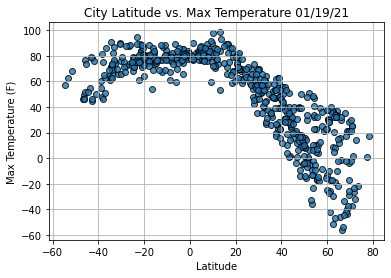

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

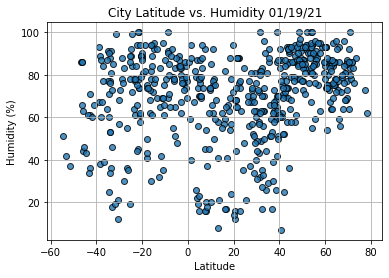

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

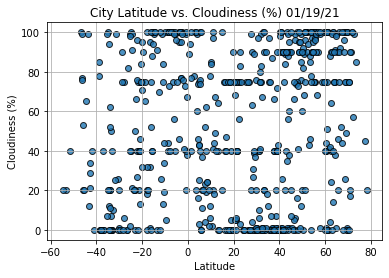

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

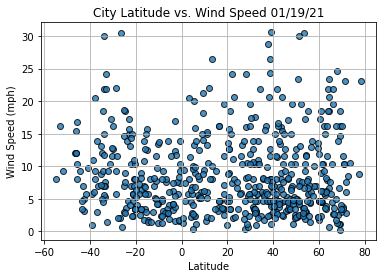

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()